In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, exp
import math

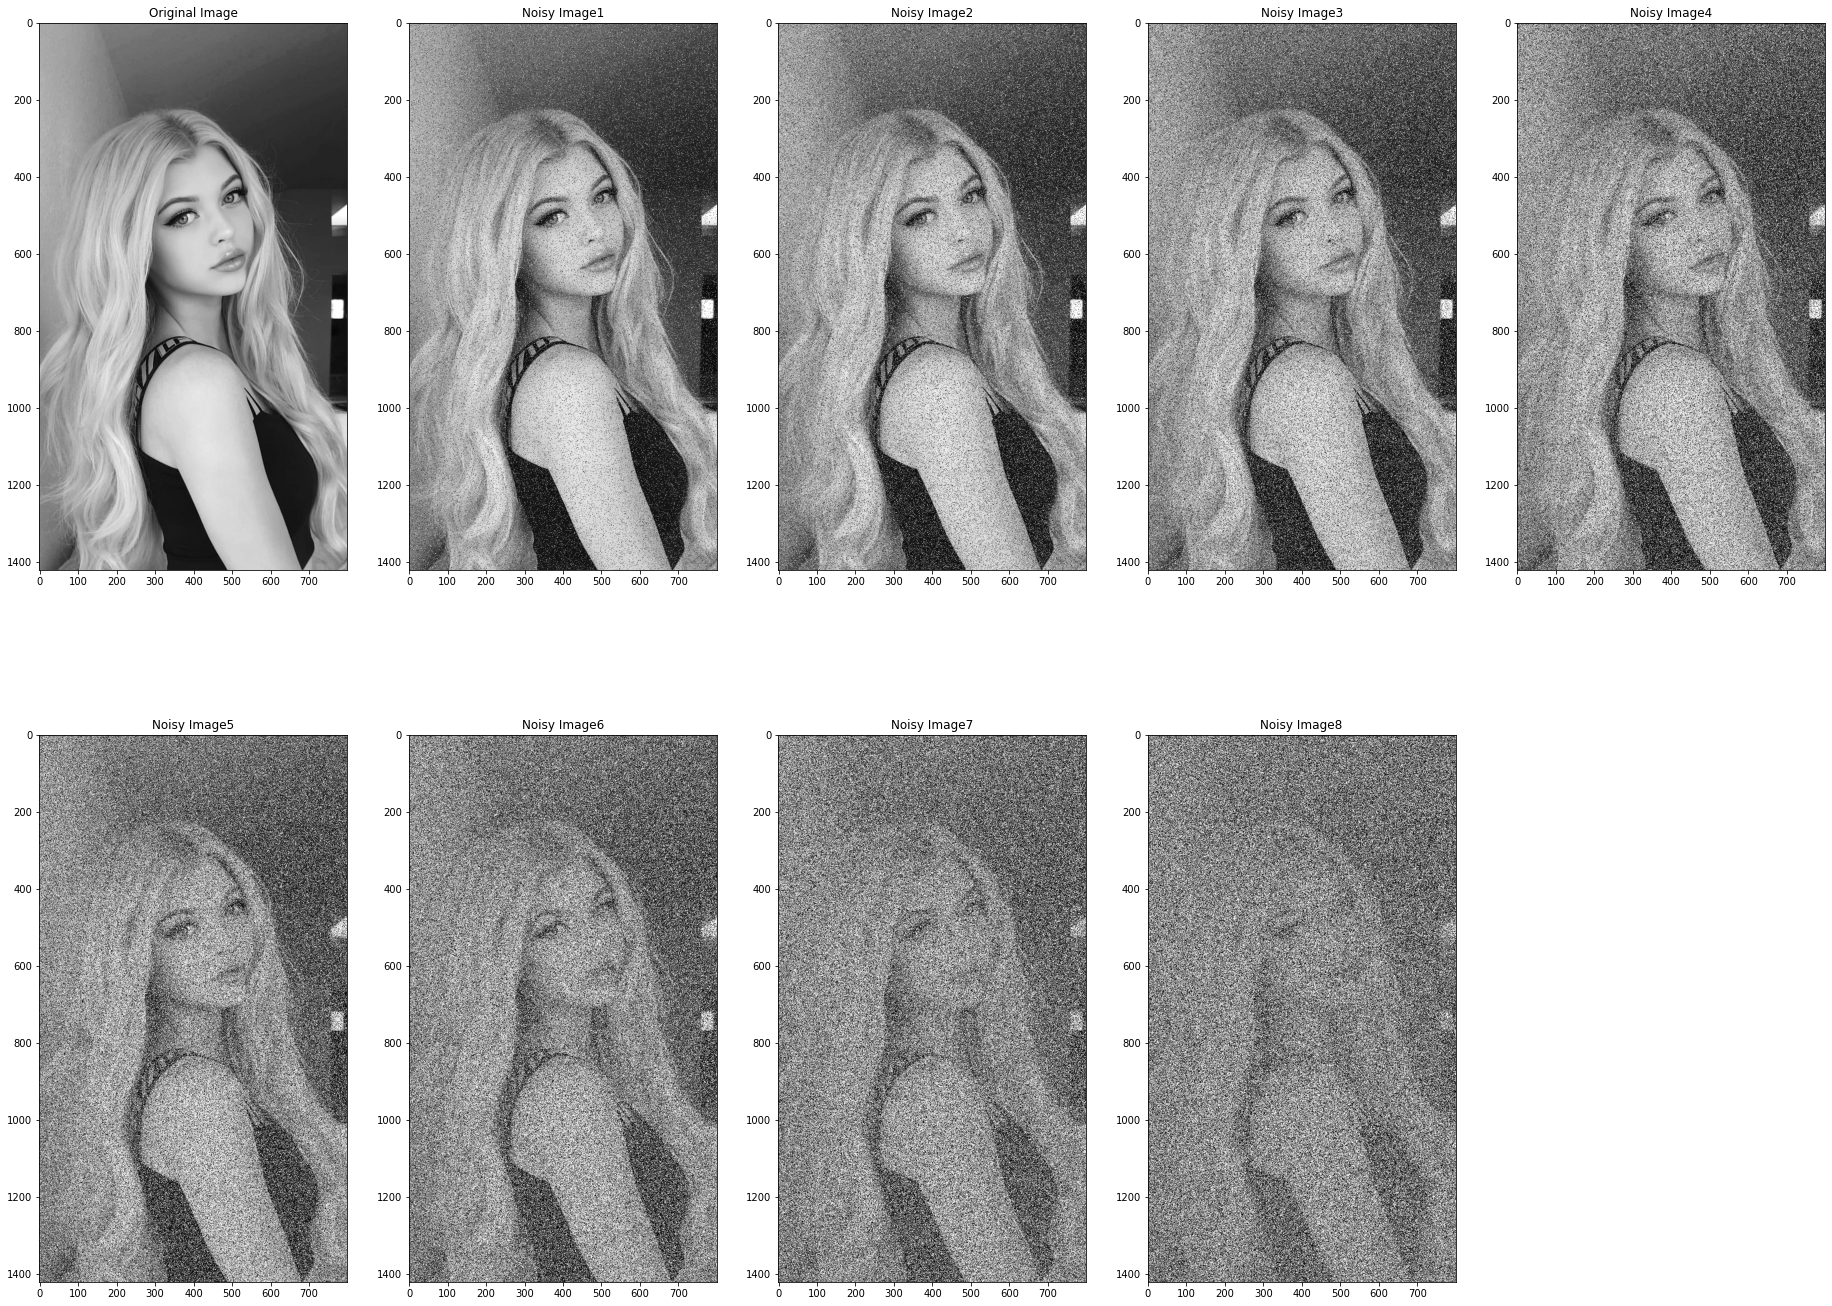

In [2]:
import random

def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image = cv2.imread('100.jpg',0) # Only for grayscale image

for k in range(9):
  noise_img = sp_noise(image,0.05*(k+1))
  cv2.imwrite('sp_noise'+str(k+1)+'.jpg', noise_img)




plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

plt.subplot(251), plt.imshow(image, "gray"), plt.title("Original Image")


for k in range(8):
  image = cv2.imread('sp_noise'+str(k+1)+'.jpg',0)
  plt.subplot(252+k), plt.imshow(image, "gray"), plt.title("Noisy Image"+str(k+1))



In [3]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

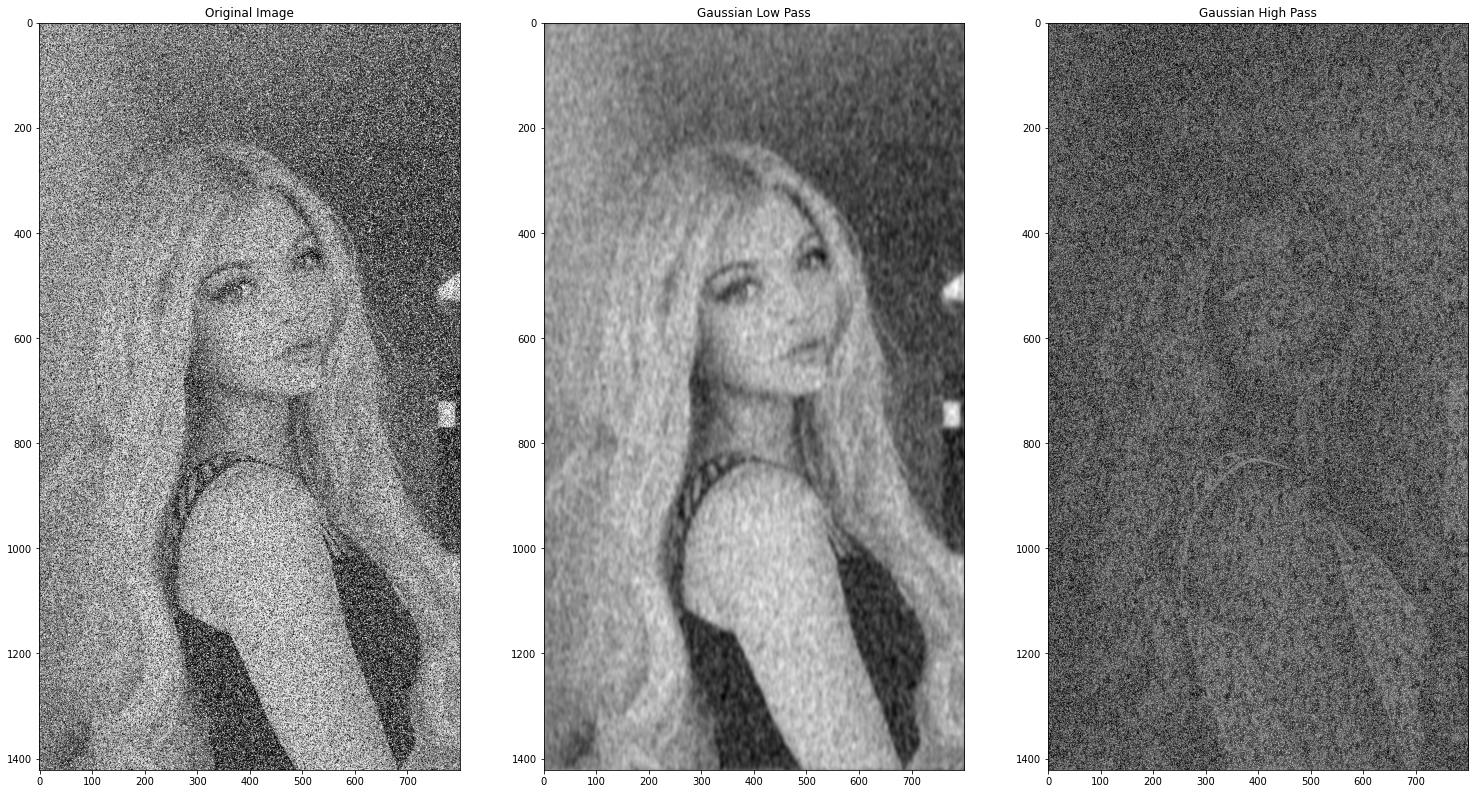

In [4]:
img = cv2.imread("sp_noise5.jpg", 0)
original = np.fft.fft2(img)
center = np.fft.fftshift(original)

plt.figure(figsize=(6.4*4, 4.8*4), constrained_layout=False)

plt.subplot(131), plt.imshow(img, "gray"), plt.title("Original Image")

LowPassCenter = center * gaussianLP(50,img.shape)
LowPass = np.fft.ifftshift(LowPassCenter)
inverse_LowPass = np.fft.ifft2(LowPass)
plt.subplot(132), plt.imshow(np.abs(inverse_LowPass), "gray"), plt.title("Gaussian Low Pass")

HighPassCenter = center * gaussianHP(50,img.shape)
HighPass = np.fft.ifftshift(HighPassCenter)
inverse_HighPass = np.fft.ifft2(HighPass)
plt.subplot(133), plt.imshow(np.abs(inverse_HighPass), "gray"), plt.title("Gaussian High Pass")


plt.show()

In [5]:
from skimage import measure 
from skimage.metrics import structural_similarity as ssim

img_ = cv2.imread("100.jpg", 0)
img_ref = img_.astype(np.float64)

PSNR_l_g = []
PSNR_h_g = [] 
SSIM_h_g = [] 
SSIM_l_g = []


for i in range(9):
  img = cv2.imread("sp_noise"+str(i+1)+".jpg", 0)
  original = np.fft.fft2(img)
  center = np.fft.fftshift(original)

  LowPassCenter_g = center * gaussianLP(50,img.shape)
  LowPass_g = np.fft.ifftshift(LowPassCenter_g)
  inverse_LowPass_g = np.fft.ifft2(LowPass_g)

  mse = np.mean(np.abs(img_ref - inverse_LowPass_g)**2)
  psnr_g = 20 * math.log10(255.0 / math.sqrt(mse))
  PSNR_l_g.append(psnr_g)

  SSIM_l_g.append((np.abs(ssim(img_ref, inverse_LowPass_g))))

    

for i in range(9):
  img = cv2.imread("sp_noise"+str(i+1)+".jpg", 0)
  original = np.fft.fft2(img)
  center = np.fft.fftshift(original)

  HighPassCenter_g = center * gaussianHP(50,img.shape)
  HighPass_g = np.fft.ifftshift(HighPassCenter_g)
  inverse_HighPass_g = np.fft.ifft2(HighPass_g)

  mse = np.mean(np.abs(img_ref - inverse_HighPass_g)**2)
  psnr_g = 20 * math.log10(255.0 / math.sqrt(mse))
  PSNR_h_g.append(psnr_g)

  SSIM_h_g.append((np.abs(ssim(img_ref, inverse_HighPass_g))))

 
print(PSNR_l_g)
print(PSNR_h_g)

print(SSIM_l_g)
print(SSIM_h_g)

  








/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
/usr/local/lib/python3.7/dist-packages/skimage/metrics/_structural_similarity.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  im2 = im2.astype(np.float64)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.


[26.71890376125193, 23.739945216032638, 21.32829025904671, 19.330225292183396, 17.679291758889335, 16.28172461025752, 15.072605671460028, 13.937266237042286, 13.018283804443351]
[4.406948835059644, 4.077023890911541, 3.7838104569913895, 3.5198194603826805, 3.282172317109906, 3.0662818036485033, 2.870316269046622, 2.6908795791743483, 2.5297767790828827]
[0.28250406818708956, 0.227361600091193, 0.18841081542701965, 0.1539520397231518, 0.1275989908290718, 0.09635933123691118, 0.07102591785134318, 0.04857089407599892, 0.020384156907821017]
[0.0025474909281355917, 0.0012070591775485732, 0.0007432315045904707, 0.0004219265939553817, 0.0002586785910054774, 0.00016497502237703895, 8.763733830162727e-05, 4.85131349717241e-05, 2.6712766175057868e-05]


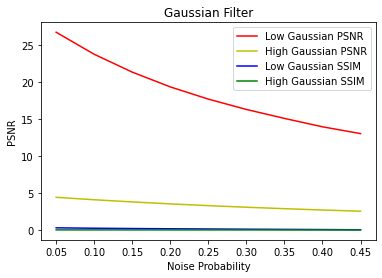

In [8]:
X = np.linspace(0.05, 0.45, 9)
plt.plot(X, PSNR_l_g, color = 'r', label = 'Low Gaussian PSNR')
plt.plot(X, PSNR_h_g, color = 'y', label = 'High Gaussian PSNR')
plt.plot(X, SSIM_l_g, color = 'b', label = 'Low Gaussian SSIM')
plt.plot(X, SSIM_h_g, color = 'g', label = 'High Gaussian SSIM')



plt.xlabel('Noise Probability')
plt.ylabel('PSNR')
plt.title('Gaussian Filter')

plt.legend()

plt.show()

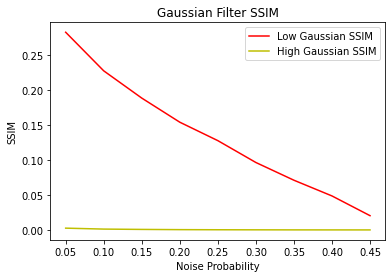

In [10]:
X = np.linspace(0.05, 0.45, 9)

plt.plot(X, SSIM_l_g, color = 'r', label = 'Low Gaussian SSIM')
plt.plot(X, SSIM_h_g, color = 'y', label = 'High Gaussian SSIM')

plt.xlabel('Noise Probability')
plt.ylabel('SSIM')
plt.title('Gaussian Filter SSIM')

plt.legend()

plt.show()